Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **48 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nahom Agize"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Hiring problem and random variables

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1 [time estimate: 5 minutes]
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [ ]:
def hire_assistant(applicants):
    """
    This function should output the number of assistants hired.
    
    Parameters
    ----------
    applicants : list
        A list of the numbers that represent the level of qualification of 
        the applicants; the higher the number, the better qualified.
        
    Returns
    -------
    hires : int
        Number of assistants hired.
    
    
    """
    hires = 0                     #initiating hires to zero since there are no hires
    best = float('-inf')          #least possible level of candidacy initiated (dummy level)
    for i in applicants:     
        if i > best:              #if level of qualification of current applicant is better than the best
            hires += 1            #hire him/her (hires counter)
            best = i              #make him/her the best
    
    return hires                   #return the number of hires
    #raise NotImplementedError()

In [ ]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2 [time estimate: 5 minutes]

Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [ ]:
import random

random.seed(80)                      #generate the same random number

def experimental_hires(N):
    
    
    simulation = 50                    #use multiple simulations to provide a better estimate
    hires = 0
    for n in range(N):
        hires += hire_assistant([random.random() for i in range(N)])           #use the random module to create a random list of candidates' level of qualificaiton
    
    return (hires/simulation)                               # calculating the average
    
    #raise NotImplementedError()
    


## Question 3 [time estimtate: 10 minutes]

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [ ]:
def analytical_hires(N):
    """
    This function returns the analytical expected number of
    hires if there are N applicants
    
    Parameters
    ----------
    N : int
        Number of applicants
        
    Returns
    -------
    hires : float
        Average number of assistants hired
    
    Note
    ----
    From the textbook, we know that the analytical result is
    
        1 + 1/2 + 1/3 + ... + 1/N
        
    """
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

In [ ]:
print(analytical_hires(50))

4.499205338329423


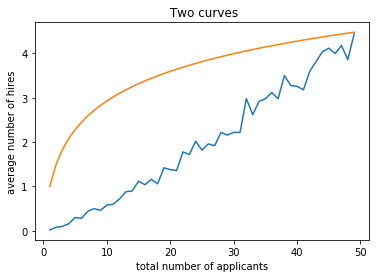

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
x = list(range(1,50))

experimental = []                           #initializing the lists for both approaches
analytical = []

for i in range(1, 50):
    experimental.append(experimental_hires(i))       #appending our functions into the lists
    analytical.append(analytical_hires(i))


plt.plot(x, experimental, label = "experimental")          #PLOT
plt.plot(x, analytical, label = "analytical")
plt.xlabel('total number of applicants')
plt.ylabel('average number of hires')
plt.title(' Two curves')
plt.show()
#raise NotImplementedError()

## Question 4 [time estimate: 10 minutes]

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

Text(0.5, 1.0, 'Probabilitic analysis')

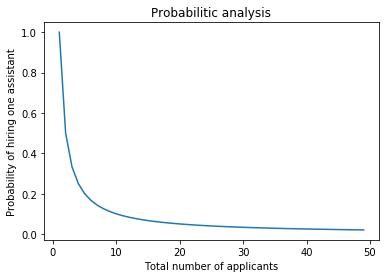

In [ ]:
y = [1/i for i in range(1,50)]                    #Forumula is given in the reading, i.e. p(i) = 1/i
plt.plot(x,y)
plt.xlabel("Total number of applicants")
plt.ylabel("Probability of hiring one assistant")
plt.title("Probabilitic analysis")
#raise NotImplementedError()

## [Optional] Question 5 [time estimate: 15 minutes]
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1 [time estimate: 3 minutes]
Knowing that everyone’s hats are unique and every guest has a hat, do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

I believe there will be a subtle difference as compared to the the hiring assistant problem. Here everyone's hats are unique and, one hat can only belong to one guest. In contrast, an assistant can have the same level of qualification as another assistant, thus lacks uniqueness to every applicant.

## Question 2 [time estimate: 3 minutes]

Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants
```
**Command 1.**
```
hat_list = [np.random.integers(0,n) for i in range(n)]
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2

## Question 3 [time estimate: 5 minutes]

Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [ ]:
import numpy as np

def hat_check(N):
    
    hat_list = list(range(N))             #creating the hat_list with N number of guests
    np.random.shuffle(hat_list)           #randomizing the list
    
    correct = 0

    for i in hat_list:                    #if guest recieves his own hat
        if i == hat_list[i]:              #increment correct by 1
            correct += 1
    
    return correct

#raise NotImplementedError()

## Question 4 [time estimate: 7 minutes]

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

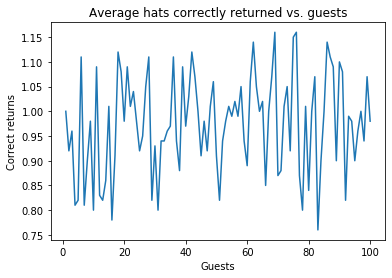

In [ ]:
x = list(range(1,50))
returned_list = []
# Find average of hats returned correctly for each guest
for i in range(1,):
    # Simulate many times, take the average
    returned= 0
    simulations = 100
    for j in range(simulations):
        returned += hat_check(i)
    returned_list.append(returned / simulations)
# Create graph
plt.plot(x, returned_list)
plt.xlabel("Guests")
plt.ylabel("Correct returns")
plt.title("Average hats correctly returned vs. guests")
plt.show()
#raise NotImplementedError()

## [Optional] Question 5 [time estimate: 15 minutes]

As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE